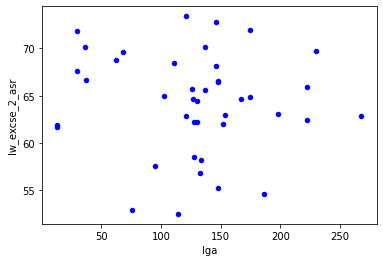

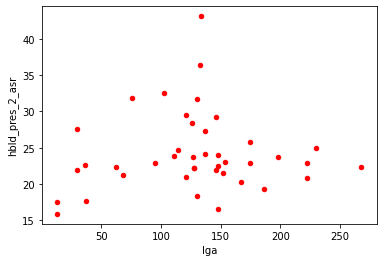

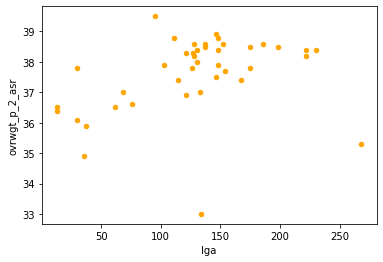

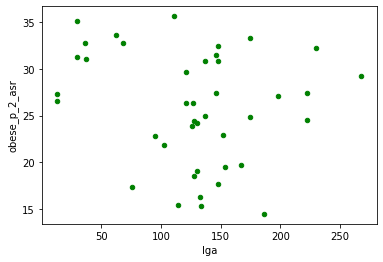

In [3]:
import pandas as pd
import re

#Read the data from csv into dataframe
LGA_INFO = pd.read_csv('Data/LGA_2016_VIC.csv')
LGA_SPORT_FACILITY = pd.read_csv('Data/Victoria_Sport_and_Recreation_Facility_Location.csv')
LGA_HEALTH_RISK = pd.read_csv('Data/LGA15_Adults_Health_Risk_Factor_Estimates.csv')

#Cleaning area name and corresponding area code, and make a dictionary
LGA_NAME_TO_CODE = LGA_INFO[['LGA_CODE_2016', 'LGA_NAME_2016']]
LGA_NAME_TO_CODE = LGA_NAME_TO_CODE.drop_duplicates()
LGA_NAME_TO_CODE['LGA_NAME_2016'] = LGA_NAME_TO_CODE['LGA_NAME_2016'].str.replace(r' \([^()]*\)', '', regex=True)
LGA_NAME_TO_CODE['LGA_NAME_2016'] = LGA_NAME_TO_CODE['LGA_NAME_2016'].str.upper()
LGA_DIC = LGA_NAME_TO_CODE.set_index('LGA_NAME_2016')['LGA_CODE_2016'].to_dict()

#Find the corresponding area codes for the sport facilities
area_code = LGA_SPORT_FACILITY['lga'].to_list()
for i in range(len(area_code)):
    if area_code[i] in LGA_DIC:
        area_code[i] = LGA_DIC[area_code[i]]
    else:
        area_code[i] = None

#Print the area names that does not have a corresponding code
# for i in range(len(area_code)):
#     if area_code[i] == None:
#         print(LGA_SPORT_FACILITY['lga'].to_list()[i])

#Add the area codes and clean the sport facility dataframe
LGA_SPORT_FACILITY['lga_code'] = area_code
LGA_SPORT_FACILITY = LGA_SPORT_FACILITY.dropna(subset=['lga_code'])
LGA_SPORT_FACILITY['lga_code'] = LGA_SPORT_FACILITY['lga_code'].astype(dtype='int')

#Group the sport facilities by area code
FACILITY_COUNT_PER_LGA = LGA_SPORT_FACILITY.groupby('lga_code', as_index=False).count()[['lga_code', 'lga']]
#print(FACILITY_COUNT_PER_LGA)

#Join the sport facility dataframe and health risk dataframe together by lga
JOINED = FACILITY_COUNT_PER_LGA.set_index('lga_code').join(LGA_HEALTH_RISK.set_index('lga_code'), on='lga_code', how='left', sort=False)
# print(JOINED)

plot1 = JOINED.plot.scatter(x='lga', y='lw_excse_2_asr', c='Blue')
plot2 = JOINED.plot.scatter(x='lga', y='hbld_pres_2_asr', c='Red')
plot3 = JOINED.plot.scatter(x='lga', y='ovrwgt_p_2_asr', c='Orange')
plot4 = JOINED.plot.scatter(x='lga', y='obese_p_2_asr', c='Green')

#Read region population csv
region_population = pd.read_csv('Data/regional_population_csv.csv')

#Join region_population dataframe and JOINED together by lga code
JOINED_2 = JOINED.join(region_population.set_index('lga_code'), on='lga_code', how='left', sort=False)
JOINED_2['num_facility_per_capita(2016)']=JOINED_2['lga']/JOINED_2['population2016']
JOINED_2['num_facility_per_capita(2017)']=JOINED_2['lga']/JOINED_2['population2017']
JOINED_2['num_facility_per_km2']=JOINED_2['lga']/JOINED_2['Area(km2)']

# Remove one outlier with num_facility_perr_km2 > 5
JOINED_2 = JOINED_2[JOINED_2['num_facility_per_km2']<5]


In [7]:
print(JOINED_2['lw_excse_2_asr'].mean())
print(JOINED_2['obese_p_2_asr'].mean())
print(JOINED_2['hbld_pres_2_asr'].mean())
print(JOINED_2['psych_dstrs_2_asr'].mean())
print(JOINED_2['smkrs_p_2_asr'].mean())
print(JOINED_2['alchl_p_2_asr'].mean())
print(JOINED_2['wst_meas_p_2_asr'].mean())

64.41749999999999
26.04
23.9075
12.0525
15.339999999999998
15.49
61.09000000000001


In [14]:
import numpy as np

num_facility_per_km2 = JOINED_2['num_facility_per_km2'].to_list()
lw_excse_2_asr = JOINED_2['lw_excse_2_asr'].to_list()
obese_p_2_asr = JOINED_2['obese_p_2_asr'].to_list()
hbld_pres_2_asr = JOINED_2['hbld_pres_2_asr'].to_list()
psych_dstrs_2_asr = JOINED_2['psych_dstrs_2_asr'].to_list()
smkrs_p_2_asr = JOINED_2['smkrs_p_2_asr'].to_list()
alchl_p_2_asr = JOINED_2['alchl_p_2_asr'].to_list()
wst_meas_p_2_asr = JOINED_2['wst_meas_p_2_asr'].to_list()


lw_excse_2_asr_class = []
obese_p_2_asr_class = []
hbld_pres_2_asr_class = []
psych_dstrs_2_asr_class = []
smkrs_p_2_asr_class = []
alchl_p_2_asr_class = []
wst_meas_p_2_asr_class = []


#classify the Estimated number of people who did low or no exercise into two classes
for i in range(len(lw_excse_2_asr)):
    if lw_excse_2_asr[i] >= 64.4175:
        lw_excse_2_asr_class.append("high") 
    else:
        lw_excse_2_asr_class.append("low")
        
#classify the Estimated number of obese people into two classes
for i in range(len(obese_p_2_asr)):
    if obese_p_2_asr[i] >= 26.04:
        obese_p_2_asr_class.append("high") 
    else:
        obese_p_2_asr_class.append("low")
        
#classify the Estimated number of people with high blood pressure into two classes
for i in range(len(hbld_pres_2_asr)):
    if hbld_pres_2_asr[i] >= 23.9075:
        hbld_pres_2_asr_class.append("high") 
    else:
        hbld_pres_2_asr_class.append("low")
    
#classify the Estimated number of people with psychological distress into two classes
for i in range(len(psych_dstrs_2_asr)):
    if psych_dstrs_2_asr[i] >= 12.0525:
        psych_dstrs_2_asr_class.append("high") 
    else:
        psych_dstrs_2_asr_class.append("low")
        
#classify the Estimated number of people who were current smokers into two classes
for i in range(len(smkrs_p_2_asr)):
    if smkrs_p_2_asr[i] >= 15.340:
        smkrs_p_2_asr_class.append("high") 
    else:
        smkrs_p_2_asr_class.append("low")

#classify the alchoholic into two classes
for i in range(len(alchl_p_2_asr)):
    if alchl_p_2_asr[i] >= 15.49:
        alchl_p_2_asr_class.append("high") 
    else:
        alchl_p_2_asr_class.append("low")

#classify the Estimated number of people with a high risk waist measurement into two classes
for i in range(len(wst_meas_p_2_asr)):
    if wst_meas_p_2_asr[i] >= 61.09:
        wst_meas_p_2_asr_class.append("high") 
    else:
        wst_meas_p_2_asr_class.append("low")
        
#reshape the data into 1 dimension
X_1 = np.array(num_facility_per_km2)
y_1 = np.array(lw_excse_2_asr_class)
y_2 = np.array(obese_p_2_asr_class)
y_3 = np.array(hbld_pres_2_asr_class)
y_4 = np.array(psych_dstrs_2_asr_class)
y_5 = np.array(smkrs_p_2_asr_class)
y_6 = np.array(alchl_p_2_asr_class)
y_7 = np.array(wst_meas_p_2_asr_class)
X = X_1.reshape(-1, 1)
y_11 = y_1.reshape(-1,1)
y_22 = y_2.reshape(-1,1)
y_33 = y_3.reshape(-1,1)
y_44 = y_4.reshape(-1,1)
y_55 = y_5.reshape(-1,1)
y_66 = y_6.reshape(-1,1)
y_77 = y_7.reshape(-1,1)
        

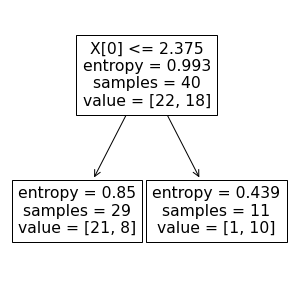

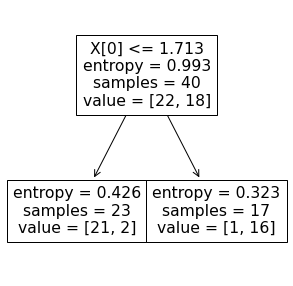

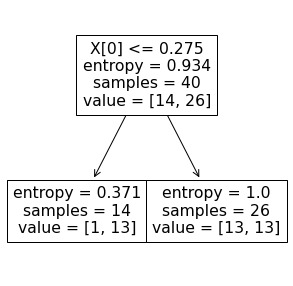

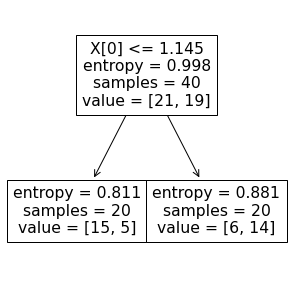

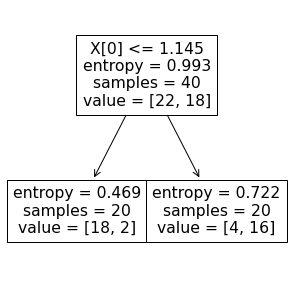

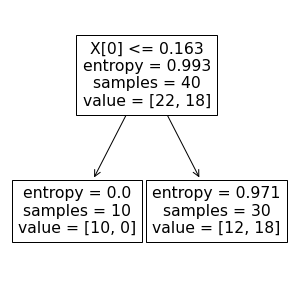

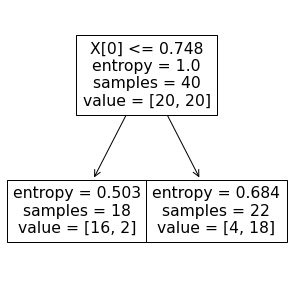

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

#plot the decision tree for the Estimated number of people who did low or no exercise
low_Exercise = tree.DecisionTreeClassifier(criterion="entropy",random_state=1, max_depth=1)
Fit_1 = low_Exercise.fit(X, y_11)
plt.figure(figsize=(5,5))
tree.plot_tree(Fit_1)
plt.show()

#plot the decision tree for the Estimated number of obese people
obesity = tree.DecisionTreeClassifier(criterion="entropy",random_state=1, max_depth=1)
Fit_2 = low_Exercise.fit(X, y_22)
plt.figure(figsize=(5,5))
tree.plot_tree(Fit_2)
plt.show()

#plot the decision tree for the Estimated number of people with high blood pressur
high_blood_pressure = tree.DecisionTreeClassifier(criterion="entropy",random_state=1, max_depth=1)
Fit_3 = low_Exercise.fit(X, y_33)
plt.figure(figsize=(5,5))
tree.plot_tree(Fit_3)
plt.show()

#plot the decison tree for the Estimated number of people with psychological distress
overweight = tree.DecisionTreeClassifier(criterion="entropy",random_state=1, max_depth=1)
Fit_4 = low_Exercise.fit(X, y_44)
plt.figure(figsize=(5,5))
tree.plot_tree(Fit_4)
plt.show()

#plot the decison tree for the Estimated number of people who were current smokers
overweight = tree.DecisionTreeClassifier(criterion="entropy",random_state=1, max_depth=1)
Fit_5 = low_Exercise.fit(X, y_55)
plt.figure(figsize=(5,5))
tree.plot_tree(Fit_5)
plt.show()

#plot the decison tree for the alchoholic
overweight = tree.DecisionTreeClassifier(criterion="entropy",random_state=1, max_depth=1)
Fit_6 = low_Exercise.fit(X, y_66)
plt.figure(figsize=(5,5))
tree.plot_tree(Fit_6)
plt.show()

#plot the decison tree for the Estimated number of people with a high risk waist measurement
overweight = tree.DecisionTreeClassifier(criterion="entropy",random_state=1, max_depth=1)
Fit_7 = low_Exercise.fit(X, y_77)
plt.figure(figsize=(5,5))
tree.plot_tree(Fit_7)
plt.show()